D:\gejun\Documents\Git\YuEbaoPrediction\LSTM_prediction


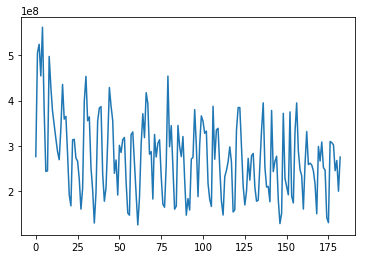

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 256)               270336    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 270,593
Trainable params: 270,593
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100


 - 2s - loss: 0.0372


Epoch 2/100


 - 1s - loss: 0.0251


Epoch 3/100


 - 1s - loss: 0.0234


Epoch 4/100


 - 1s - loss: 0.0219


Epoch 5/100


 - 1s - loss: 0.0215


Epoch 6/100


 - 1s - loss: 0.0222


Epoch 7/100


 - 1s - loss: 0.0214


Epoch 8/100


 - 1s - loss: 0.0212


Epoch 9/100


 - 1s - loss: 0.0221


Epoch 10/100


 - 1s - loss: 0.0215


Epoch 11/100


 - 1s - loss: 0.0211


Epoch 12/100


 - 1s - loss: 0.0218


Epoch 13/100


 - 1s - loss: 0.0224


Epoch 14/100


 - 1s - loss: 0.0210


Epoch 15/100


 - 1s - loss: 0.0225


Epoch 16/100


 - 1s - loss: 0.0217


Epoch 17/100


 - 1s - loss: 0.0209


Epoch 18/100


 - 1s - loss: 0.0217


Epoch 19/100


 - 1s - loss: 0.0213


Epoch 20/100


 - 1s - loss: 0.0208


Epoch 21/100


 - 1s - loss: 0.0209


Epoch 22/100


 - 1s - loss: 0.0210


Epoch 23/100


 - 1s - loss: 0.0213


Epoch 24/100


 - 1s - loss: 0.0211


Epoch 25/100


 - 1s - loss: 0.0211


Epoch 26/100


 - 1s - loss: 0.0214


Epoch 27/100


 - 1s - loss: 0.0215


Epoch 28/100


 - 1s - loss: 0.0208


Epoch 29/100


 - 1s - loss: 0.0208


Epoch 30/100


 - 1s - loss: 0.0211


Epoch 31/100


 - 1s - loss: 0.0217


Epoch 32/100


 - 1s - loss: 0.0214


Epoch 33/100


 - 1s - loss: 0.0208


Epoch 34/100


 - 1s - loss: 0.0208


Epoch 35/100


 - 1s - loss: 0.0208


Epoch 36/100


 - 1s - loss: 0.0215


Epoch 37/100


 - 1s - loss: 0.0203


Epoch 38/100


 - 1s - loss: 0.0209


Epoch 39/100


 - 1s - loss: 0.0208


Epoch 40/100


 - 1s - loss: 0.0197


Epoch 41/100


 - 1s - loss: 0.0211


Epoch 42/100


 - 1s - loss: 0.0207


Epoch 43/100


 - 1s - loss: 0.0199


Epoch 44/100


 - 1s - loss: 0.0209


Epoch 45/100


 - 1s - loss: 0.0192


Epoch 46/100


 - 1s - loss: 0.0202


Epoch 47/100


 - 1s - loss: 0.0204


Epoch 48/100


 - 1s - loss: 0.0205


Epoch 49/100


 - 1s - loss: 0.0202


Epoch 50/100


 - 1s - loss: 0.0212


Epoch 51/100


 - 1s - loss: 0.0203


Epoch 52/100


 - 1s - loss: 0.0204


Epoch 53/100


 - 1s - loss: 0.0213


Epoch 54/100


 - 1s - loss: 0.0194


Epoch 55/100


 - 1s - loss: 0.0216


Epoch 56/100


 - 1s - loss: 0.0204


Epoch 57/100


 - 1s - loss: 0.0201


Epoch 58/100


 - 1s - loss: 0.0205


Epoch 59/100


 - 1s - loss: 0.0201


Epoch 60/100


 - 1s - loss: 0.0198


Epoch 61/100


 - 1s - loss: 0.0199


Epoch 62/100


 - 1s - loss: 0.0207


Epoch 63/100


 - 1s - loss: 0.0203


Epoch 64/100


 - 1s - loss: 0.0196


Epoch 65/100


 - 1s - loss: 0.0198


Epoch 66/100


 - 1s - loss: 0.0194


Epoch 67/100


 - 1s - loss: 0.0207


Epoch 68/100


 - 1s - loss: 0.0198


Epoch 69/100


 - 1s - loss: 0.0196


Epoch 70/100


 - 1s - loss: 0.0194


Epoch 71/100


 - 1s - loss: 0.0202


Epoch 72/100


 - 1s - loss: 0.0196


Epoch 73/100


 - 1s - loss: 0.0199


Epoch 74/100


 - 1s - loss: 0.0197


Epoch 75/100


 - 1s - loss: 0.0193


Epoch 76/100


 - 1s - loss: 0.0192


Epoch 77/100


 - 1s - loss: 0.0191


Epoch 78/100


 - 1s - loss: 0.0189


Epoch 79/100


 - 1s - loss: 0.0186


Epoch 80/100


 - 1s - loss: 0.0194


Epoch 81/100


 - 1s - loss: 0.0189


Epoch 82/100


 - 1s - loss: 0.0193


Epoch 83/100


 - 1s - loss: 0.0185


Epoch 84/100


 - 1s - loss: 0.0188


Epoch 85/100


 - 1s - loss: 0.0198


Epoch 86/100


 - 1s - loss: 0.0186


Epoch 87/100


 - 1s - loss: 0.0187


Epoch 88/100


 - 1s - loss: 0.0192


Epoch 89/100


 - 1s - loss: 0.0197


Epoch 90/100


 - 1s - loss: 0.0191


Epoch 91/100


 - 1s - loss: 0.0180


Epoch 92/100


 - 1s - loss: 0.0182


Epoch 93/100


 - 1s - loss: 0.0182


Epoch 94/100


 - 1s - loss: 0.0184


Epoch 95/100


 - 1s - loss: 0.0183


Epoch 96/100


 - 1s - loss: 0.0180


Epoch 97/100


 - 1s - loss: 0.0179


Epoch 98/100


 - 1s - loss: 0.0180


Epoch 99/100


 - 1s - loss: 0.0184


Epoch 100/100


 - 1s - loss: 0.0181


err: 0.213017581325
Train Score: 56834825.10 RMSE
Test Score: 60790866.78 RMSE


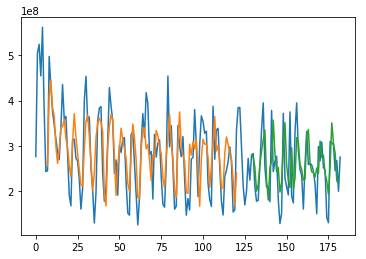

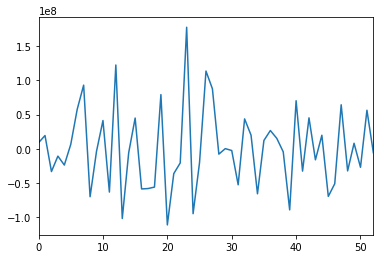

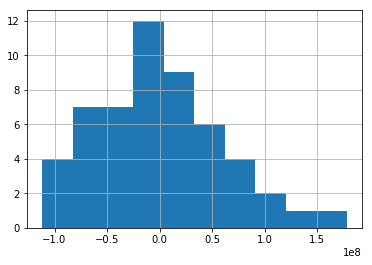

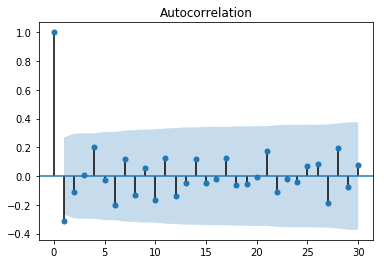

(array([  5.37294605,   6.09016272,   6.09235099,   8.45102764,
          8.50686378,  11.07453545,  11.97398538,  13.12485255,
         13.3300224 ,  15.28366815,  16.34738072,  17.65511753,
         17.82314011,  18.84881985,  19.05321601,  19.07836256,
         20.37720671,  20.69318742,  20.97414081,  20.97851446,
         23.81519139,  25.01942484,  25.05354719,  25.24081157,
         25.79546296,  26.60765109,  30.53934055,  35.0039766 ,
         35.72689095,  36.45654426,  37.1749407 ,  37.79644471,
         38.07480299,  38.73655477,  39.56257699,  39.88843033,
         41.4075091 ,  43.14478864,  43.16670995,  43.20349479]),
 array([ 0.02045141,  0.04759244,  0.10720258,  0.07638563,  0.1304255 ,
         0.08609996,  0.10141763,  0.10762542,  0.14823282,  0.12205699,
         0.12871657,  0.12657065,  0.16435092,  0.17080671,  0.21133252,
         0.26462049,  0.25539178,  0.29517372,  0.33823152,  0.3983982 ,
         0.30209897,  0.29614671,  0.34753034,  0.39277055,  0.418

In [56]:
%cd D:\\gejun\\Documents\\Git\\YuEbaoPrediction\\LSTM_prediction

'''
申购的lstm
'''
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras.models
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from statsmodels.tsa.stattools import acf, pacf



import pandas as pd
from sklearn.externals import joblib
import os
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

dataframe = read_csv('../file/group_by_date.csv', usecols=[3], engine='python')
dataframe = dataframe[244:]
dataset = dataframe.values
dataset = dataset.astype('float64')
plt.plot(dataset)
plt.show()

# fix random seed for reproducibility
np.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# use this function to prepare the train and test datasets for modeling
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
myfile = os.path.exists("lstm.model")
if myfile:
    print("ssss")
else:
    model_prob = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

errs = mape(testY[0],testPredict[:,0])
print("err:",errs)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainData = pd.DataFrame({'trainpredict':trainPredict[:,0],'actual':trainY[0]})
testData = pd.DataFrame({'testpredict':testPredict[:,0],'actual':testY[0]})
trainData.to_csv("../file/3_8_purchase_train.csv")
testData.to_csv("../file/3_8_purchase_test.csv")
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

test_df = read_csv('../file/3_8_purchase_test.csv', engine='python')
residual = test_df['actual'] - test_df['testpredict']
residual.describe()
mean = residual.mean()
mean_test_predict = test_df['testpredict'] + mean
mean_residual = test_df['actual'] - mean_test_predict
mean_residual.describe()

%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
mean_residual.plot()
plt.show()

# 直方图 是否正态分布
mean_residual.hist()
plt.show()

# autocorrelation
plot_acf(mean_residual, ax=plt.gca(), lags=30)
plt.show()

# LBQ 检验
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(mean_residual, lags=None, boxpierce=True)

